In [1]:
import os
import numpy as np

np.random.seed(30) # fix random seed
os.environ["CUDA_VISIBLE_DEVICES"] = '1' # fix cuda device to be used

In [5]:
## Read ALL data, standardize, and separate into train/valid

from helpers import read_and_preprocess_data

train, valid = read_and_preprocess_data()

Reading data... Data read. There are 96 series in total.
Standardizing data... Data standardized.
Separating data into train/valid... Data separated into train/valid.


# Restore model from disk

In [6]:
from model import Model
from model_defs import conv_nn_2, conv_nn_3, conv_batches_gen

nn = Model('./results/1538524287')
nn.set_data(train, valid)
# nn.validate(4096, conv_batches_gen)

Restoring model from disk, path=`./results/1538524287`
INFO:tensorflow:Restoring parameters from /home/arthurcgusmao/Projects/eeg-grasp-and-lift/results/1538524287/tf-model


# Plot predictions and correct labels

In [7]:
valid_series = valid[3]
valid_x = valid_series[0]
valid_y = valid_series[1]
preds_y = nn.predict([(valid_x, valid_y)], 4096, conv_batches_gen)

preds_y = np.array(preds_y)
valid_y = np.array(valid_y[1023:])
# we drop the first 1023 data points because we are not able to predict them with a window size of 1024

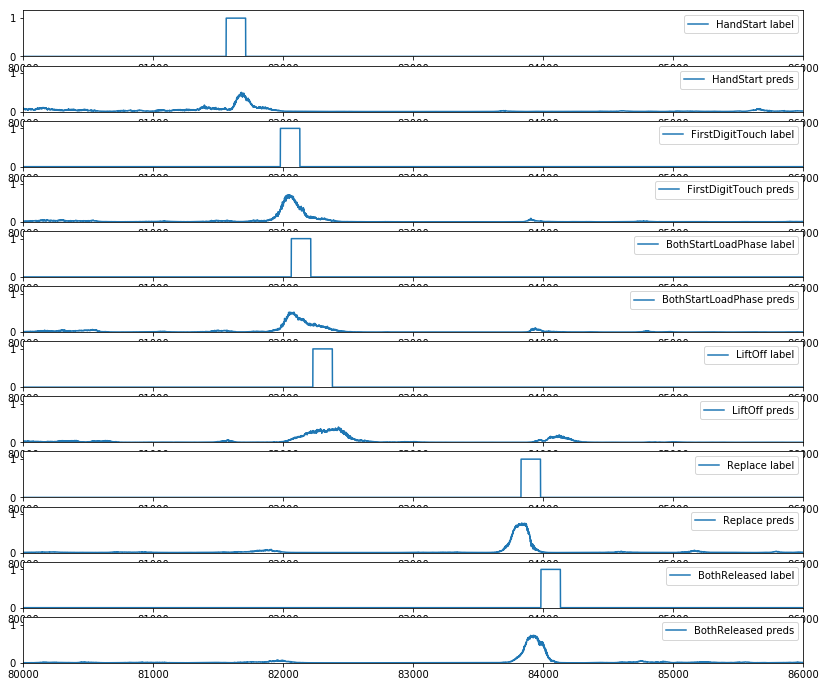

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

xlim_l = 80000
xlim_r = 86000
delta = xlim_r - xlim_l

fig = plt.figure(figsize=(0.00233*delta,12))
cols = valid[0][1].columns
first_ax = None

for idx,col in enumerate(cols):
    if first_ax == None:
        ax = fig.add_subplot(2*len(cols),1,2*idx+1)
        first_ax = ax
    else: 
        ax = fig.add_subplot(2*len(cols),1,2*idx+1, sharex=first_ax)
    ax.plot(valid_y[:,idx], label=col+' label')
    ax.set_xlim(xlim_l,xlim_r)
    ax.set_ylim(0,1.2)
    ax.legend()
    
    ax = fig.add_subplot(2*len(cols),1,2*idx+2, sharex=first_ax)
    ax.plot(preds_y[:,idx], label=col+' preds')
    ax.set_xlim(xlim_l,xlim_r)
    ax.set_ylim(0,1.2)
    
    ax.legend()